# 数学基础
## 1.1 线性代数

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import scipy.stats as stats

### 1.1.4 特殊函数

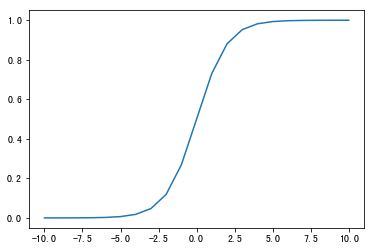

In [3]:
# sigmoid function
x_sig = np.linspace(-10, 10, num=21)
y_sig = 1 / (1 + np.exp(-x_sig))
plt.plot(x_sig, y_sig)
plt.show()

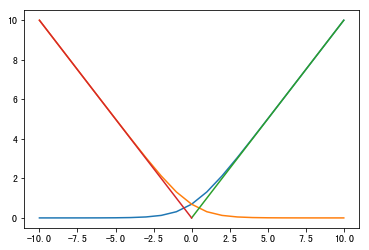

In [4]:
# softplus function
x_soft = np.linspace(-10, 10, num=21)
x_pos = x_soft[10:]
x_neg = x_soft[:11]
y_soft = np.log(1 + np.exp(x_soft))
plt.plot(x_soft, y_soft)
plt.plot(-x_soft, y_soft)
plt.plot(x_pos, x_pos)
plt.plot(x_neg, -x_neg)
plt.show()

## 1.2 概率论与随机过程
### 1.2.5 常见概率分布


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


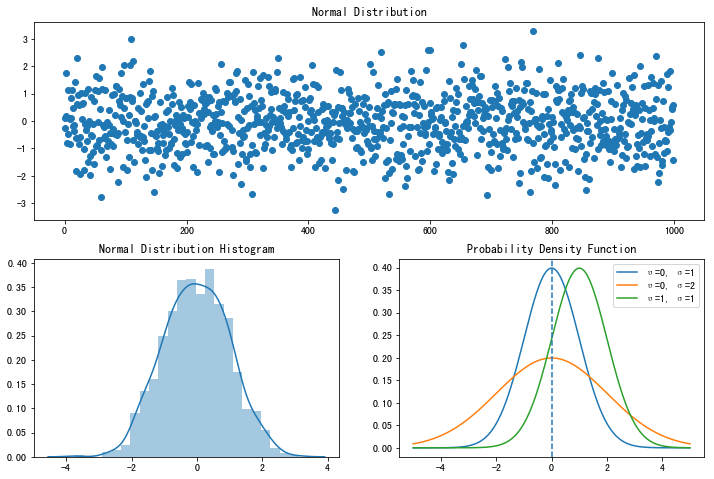

In [81]:
# 1-D Normal Distribution
plt.figure(figsize=(12, 8))
 
plt.subplot(2, 1, 1)      # 分成两行一列，起始点为1
norm = np.random.normal(loc=0,scale=1.0,size=1000)
plt.title('Normal Distribution')
plt.scatter(range(1000), norm)   # 设置xy轴范围

plt.subplot(2, 2, 3)      # 分成两行三列，起始点位4
plt.title("Normal Distribution Histogram")
sns.distplot(np.random.randn(1000))

plt.subplot(2, 2, 4)
plt.title("Probability Density Function")
indexes = np.linspace(-5, 5, num=10000)
nd_1 = stats.norm.pdf(indexes, loc=0, scale=1)
nd_2 = stats.norm.pdf(indexes, loc=0, scale=2)
nd_3 = stats.norm.pdf(indexes, loc=1, scale=1)
plt.plot(indexes, nd_1, label='υ=0, σ=1')
plt.plot(indexes, nd_2, label='υ=0, σ=2')
plt.plot(indexes, nd_3, label='υ=1, σ=1')
plt.axvline(0, 0, 1, ls="--")
plt.legend(loc='best')
plt.savefig("norm_dist.png")
plt.show()

In [1]:
def standard_norm_2d(x, y, rho):
    exponent = -(x**2 - 2*rho*x*y + y**2) / (2*(1-rho**2))
    norm = np.exp(exponent)/(2*np.pi*np.sqrt(1-rho**2))
    return norm

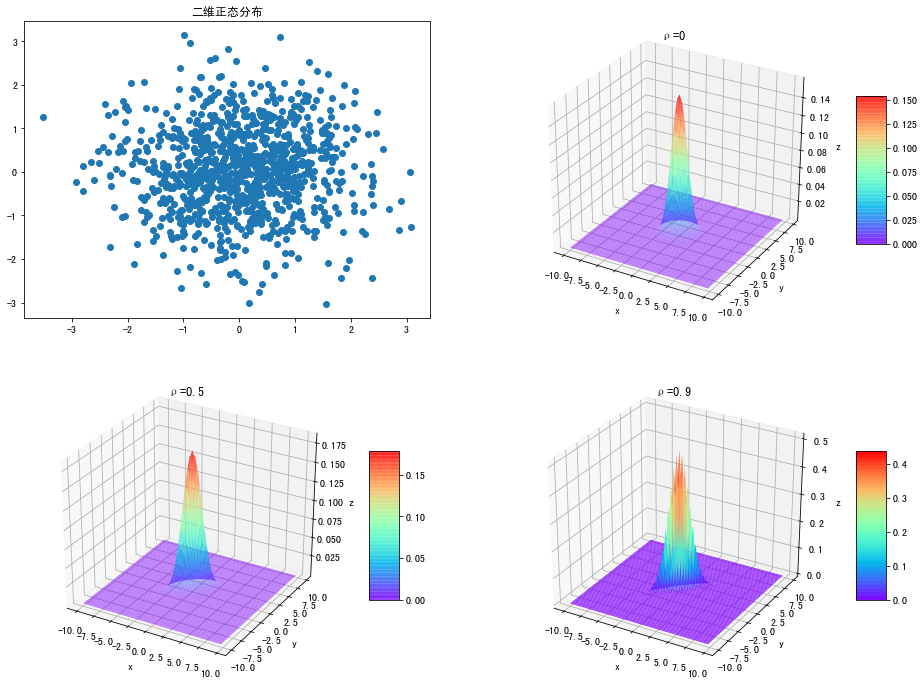

In [19]:
# 2-D Normal Distribution
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(16, 12))
ax1 = fig.add_subplot(221)
mu_x,delta_x= 0, 1
mu_y,delta_y = 0, 1
x = mu_x + delta_x * np.random.randn(1000)
y = mu_y + delta_y * np.random.randn(1000)
ax1.set_title('二维正态分布')
ax1.scatter(x, y)

ax2 = fig.add_subplot(222, projection='3d')
X = np.arange(-10, 10, 0.25)
Y = np.arange(-10, 10, 0.25)
X, Y = np.meshgrid(X, Y)
R1 = standard_norm_2d(X, Y, 0)
Z1 = R1
surf = ax2.plot_surface(X, Y, Z1, rstride=1, cstride=1, alpha=0.5, cmap=cm.rainbow)
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('z')
ax2.set_title('ρ=0')
plt.colorbar(surf, shrink=0.5, aspect=5)#标注

ax3 = fig.add_subplot(223, projection='3d')
R2 = standard_norm_2d(X, Y, 0.5)
Z2 = R2
surf = ax3.plot_surface(X, Y, Z2, rstride=1, cstride=1, alpha=0.5, cmap=cm.rainbow)
ax3.set_xlabel('x')
ax3.set_ylabel('y')
ax3.set_zlabel('z')
ax3.set_title('ρ=0.5')
plt.colorbar(surf, shrink=0.5, aspect=5)#标注

ax4 = fig.add_subplot(224, projection='3d')
R3 = standard_norm_2d(X, Y, 0.95)
Z3 = R3
surf = ax4.plot_surface(X, Y, Z3, rstride=1, cstride=1, alpha=0.8, cmap=cm.rainbow)
ax4.set_xlabel('x')
ax4.set_ylabel('y')
ax4.set_zlabel('z')
ax4.set_title('ρ=0.9')
plt.colorbar(surf, shrink=0.5, aspect=5)#标注

plt.show()


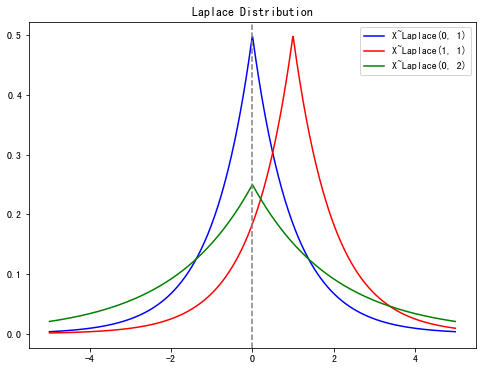

In [35]:
# Laplace Distribution
lpls_index = np.linspace(-5, 5, num=1000)
lpls_1 = stats.laplace.pdf(lpls_index, loc=0, scale=1)
lpls_2 = stats.laplace.pdf(lpls_index, loc=1, scale=1)
lpls_3 = stats.laplace.pdf(lpls_index, loc=0, scale=2)

plt.figure(figsize=(8, 6))
plt.title('Laplace Distribution')
plt.plot(lpls_index, lpls_1, color='b', label='X~Laplace(0, 1)')
plt.plot(lpls_index, lpls_2, color='r',label='X~Laplace(1, 1)')
plt.plot(lpls_index, lpls_3, color='g',label='X~Laplace(0, 2)')
plt.axvline(0, 0, 1, color='grey', ls="--")
plt.legend(loc='best')
plt.show()

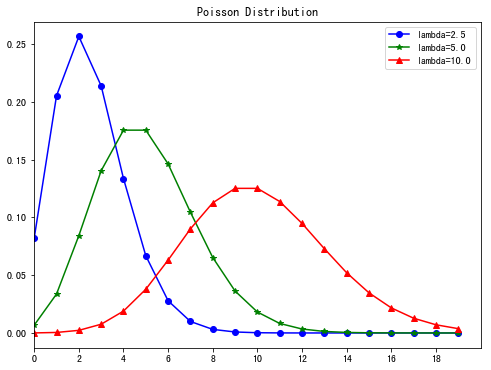

In [48]:
# Poisson Distribution
poisson_index = np.arange(0, 20)
poisson_1 = stats.poisson.pmf(poisson_index, 2.5)
poisson_2 = stats.poisson.pmf(poisson_index, 5)
poisson_3 = stats.poisson.pmf(poisson_index, 10)
plt.figure(figsize=(8, 6))
plt.xlim(0, 20)
plt.xticks(np.arange(20, step=2))
plt.plot(poisson_index, poisson_1, 'o-', color='b', label='lambda=2.5')
plt.plot(poisson_index, poisson_2, '*-', color='g', label='lambda=5.0')
plt.plot(poisson_index, poisson_3, '^-', color='r', label='lambda=10.0')
plt.title("Poisson Distribution")
plt.legend(loc='best')
plt.show()

In [49]:
# 用均匀分布模拟泊松分布
def make_poisson(lmd, tm):
    """
    用均匀分布模拟泊松分布
    首先随机性给出了 lmd*tm个事件发生的时间（时间位于区间[0,tm]）内。
    然后统计每个单位时间区间内，事件发生的次数。
    然后统计这些次数出现的频率。
    最后将这个频率与理论上的泊松分布的概率质量函数比较
    :param lmd lambda
    :param tm time
    """
    t=np.random.uniform(0,tm,size=lmd*tm) # 获取 lmd*tm 个事件发生的时刻
    count,tm_edges=np.histogram(t,bins=tm,range=(0,tm))#获取每个单位时间内，事件发生的次数
    max_k= lmd *2 # 要统计的最大次数
    dist,count_edges=np.histogram(count,bins=max_k,range=(0,max_k),density=True)
    x=count_edges[:-1]
    return x,dist,stats.poisson.pmf(x,lmd) 

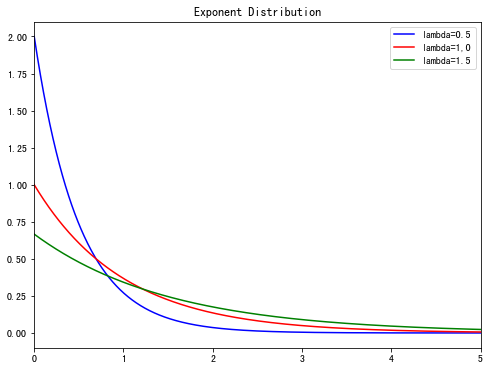

In [52]:
# Exponent Distribution
expon_index = np.linspace(0, 5, num=1000)
exp_1 = stats.expon.pdf(expon_index, scale=0.5)
exp_2 = stats.expon.pdf(expon_index, scale=1.0)
exp_3 = stats.expon.pdf(expon_index, scale=1.5)

plt.figure(figsize=(8, 6))
plt.title('Exponent Distribution')
plt.plot(expon_index, exp_1, color='b', label='lambda=0.5')
plt.plot(expon_index, exp_2, color='r',label='lambda=1,0')
plt.plot(expon_index, exp_3, color='g',label='lambda=1.5')
plt.xlim(0, 5)
plt.legend(loc='best')
plt.show()

In [53]:
# 用均匀分布模拟指数分布：
def make_expon(lmd,tm):
    '''
    用均匀分布模拟指数分布。
    :param lmd lambda
    :param tm time
    '''
    t=np.random.uniform(0,tm,size=lmd*tm) # 获取 lmd*tm 个事件发生的时刻
    sorted_t=np.sort(t) #时刻升序排列
    delt_t=sorted_t[1:]-sorted_t[:-1] #间隔序列
    dist,edges=np.histogram(delt_t,bins="auto",density=True)
    x=edges[:-1]
    return x,dist,stats.expon.pdf(x,loc=0,scale=1/lmd) #scale 为 1/lambda